### ETAS: Alaska 2018
#### 23 January 2018  09:31:42 UTC m=7.9
2018-01-23 09:31:42 UTC 56.046°N   149.073°W

lon: 149.073

lat: 56.046

In [66]:
#
%load_ext autoreload
%autoreload 2
%matplotlib inline

failed while loading urllib and/or urllib. maybe python 3.x?
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [131]:
import datetime as dtm
import matplotlib.dates as mpd
import pytz
tzutc = pytz.timezone('UTC')

#import operator
import math
import random
import numpy
import scipy
import scipy.optimize as spo
from scipy import interpolate
import itertools
import sys
#import scipy.optimize as spo
import os
import operator
#from PIL import Image as ipp
import multiprocessing as mpp
#
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import json
import pickle
#
#from sklearn.neighbors import NearestNeighbors
import sklearn
import sklearn.neighbors
#
import geopy.distance
#from geopy.distance import vincenty
#from geopy.distance import great_circle
#
#import shapely.geometry as sgp
#
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from geographiclib.geodesic import Geodesic as ggp
#
#import ANSStools as atp
from yodiipy import ANSStools as atp
#
import contours2kml
import globalETAS as gep
import global_etas_auto as ggep
from eq_params import *
#
from nepal_figs import *
import optimizers
#
import random
import geopy

#
# on a fresh linux install... (can we script this?)
# stuff we have to do besides just clone this:
# pip install geopy
# conda install basemap
# pip install geographiclib
# conda install -c ioos rtree


In [3]:
# event was some time on the 24th or maybe late the 23rd. this, plus defaults, should find the event:
#to_dt = dtm.datetime(2016,8,25, tzinfo=pytz.timezone('UTC'))
to_dt = dtm.datetime.now(pytz.timezone('UTC'))
#mainshock_dt = dtm.datetime(2017, 11, 12, 18,18,17, tzinfo=pytz.timezone('UTC'))
#
Lr_factor = 10.
#
# newest event:
t0 = dtm.datetime(2018, 1, 23, 9, 31, 42, tzinfo=pytz.timezone('UTC'))
t_ms = t0
#Location
lon0 = -149.073
lat0 = 56.046    
#
m0 = 7.9
d_lat = 7.
d_lon = 7.
#
lats = [lat0-d_lat, lat0+d_lat]
lons = [lon0-d_lon, lon0+d_lon]


In [4]:
#etas = ggep.auto_etas(to_dt=to_dt, Lr_factor=Lr_factor, dt_0=5)
#italy_prams = {'do_recarray': True, 'D_fract': 1.5,
#                't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
#                't_now':to_dt, 
#                'lats': [42.,43.5], 'p': 1.1, 'b1': 1.0, 'mc': 2.5, 'q': 1.5,
#                'lons': [12.,15.], 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
#                'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76}
cat_len_days = 3650
eq_prams = {'do_recarray': True, 'D_fract': 1.5,
               't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
               't_now':to_dt, 'cat_len':3650,
               'd_lat': .25, 'd_lon':.25, 'mc':3.0,
               'lats': lats, 'p': 1.1, 'b1': 1.0, 'q': 1.5,
               'lons': lons, 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
               'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76,
               'etas_range_factor': 25.0, 'etas_range_padding':3.}

#nz_cat0 = test_cat = atp.cat_from_geonet(lats=lats, lons=lons, m_c=2.5, date_from=dtm.datetime(2000,1,1,tzinfo=atp.tzutc),
#                              date_to=dtm.datetime.now(atp.tzutc))
#nz_cat = gep.make_ETAS_catalog_mpp(incat=nz_cat0)
#
# TODO: integrate this directly into the globalETAS() class...
#my_cat = None
my_cat = atp.cat_from_anss_and_usgs(lons=lons, lats=lats, mc=eq_prams['mc'], cat_len_days=cat_len_days, 
                                    Nmax=None, rec_array=True)
if not my_cat is None:
    my_cat = gep.make_ETAS_catalog_mpp(incat=my_cat)
#
etas_name = 'Alaska, 23 January 2018'
f_path = '/home/myoder/Dropbox/Research/etas/Alaska_2018_01_23/etas_{}'.format(eq_prams['t_now'])
f_root = 'etas_Alaska_20180123'

print('etas_name: {}'.format(etas_name))
print('f_path: {}'.format(f_path))
print('f_root: {}'.format(f_root))



url_str: http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.csv
data handle fetched...
 no file.
etas_prams:  {'do_recarray': False, 'b2': 1.5, 'b1': 1.0, 'dmstar': 1.0, 'q': 1.5, 'p': 1.1, 'fit_factor': 1.5, 'd_tau': 2.28, 'd_lambda': 1.76, 'D_fract': 1.5, 'date_range': ['1990-1-1', None], 'mc': 2.5, 'lons': [-117.0, -114.0], 'lats': [32.0, 38.0], 'incat': None}
results fetched.
etas_name: Alaska, 23 January 2018
f_path: /home/myoder/Dropbox/Research/etas/Alaska_2018_01_23/etas_2018-02-28 01:01:34.042549+00:00
f_root: etas_Alaska_20180123


### Now run (not-)ETAS:
- Note: we might have compiled a composite catalog from ANSS and USGS above. decide if we really want to do that.
  - To use just the ANSS catalog, pass catalog=None, or set my_cat=None before we execute. For domestic events, this is probably the better bet, but only by a little bit. For overseas events, ANSS can take weeks to update, so using the USGS concatenation is a good thing.

In [5]:
#etas = gep.ETAS_mpp(n_cpu=2*mpp.cpu_count(), catalog=nz_cat, **eq_prams)
etas = gep.ETAS_mpp(n_cpu=2*mpp.cpu_count(), catalog=my_cat, **eq_prams)
#
# we've run this; we can reload it from pickle:
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas = pickle.load(fin)
#

begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.000000) = 2008-03-02 01:01:34.042549+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 2407], None)
make_etas():
etas_mpp worker xyz_range:  [0, 392]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.000000) = 2008-03-02 01:01:34.042549+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 2407], [0, 392])
etas_mpp worker xyz_range:  [392, 784]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.000000) = 2008-03-02 01:01:34.042549+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 2407], [392, 784])
etas_mpp worker xyz_range:  [784, 1176]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - 

In [6]:
#print(etas.t0, etas.t_now, etas.t_forecast, etas.catalog[-1])
print(to_dt)
print(etas.t_0, mpd.num2date(etas.t_forecast), etas.t_now, t_ms)
#print(etas.catalog[-5:])
#
print('t_now: ', etas.t_now, max(etas.catalog['event_date']))

2018-02-28 01:01:34.042549+00:00
2008-03-02 01:01:34.042549+00:00 2018-02-28 01:01:34.042546+00:00 2018-02-28 01:01:34.042549+00:00 2018-01-23 09:31:42+00:00
t_now:  2018-02-28 01:01:34.042549+00:00 2018-02-28T00:48:00.000661


/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


ms:  {'mag': 7.9, 'lon': -149.073, 'lat': 56.046, 'event_date': datetime.datetime(2018, 1, 23, 9, 31, 42, tzinfo=<UTC>)} -149.073 56.046


/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


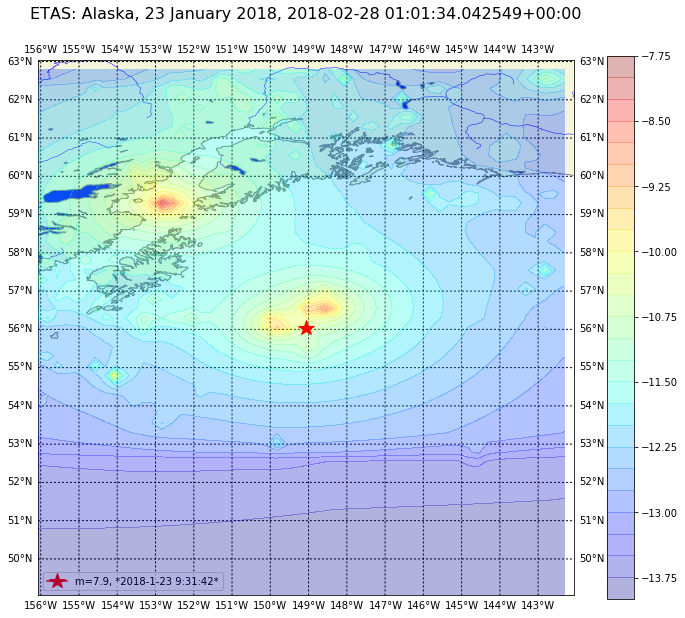

In [7]:
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='f', alpha=.3, ax=ax)
#
#mainshock = sorted(etas.catalog, key=lambda rw: rw['mag'])[-1]
#print('mainshock: ', mainshock)
# get mainshock. it's an m>6 event in the last week or so... this is subjective.
# if we just look for the biggest event, we get the L'Aquila event, so we'll need to be more creative...
# or just specify it.

#mainshock = etas.catalog[-1]
mainshock = {'mag':7.9, 'lon':lon0, 'lat':lat0, 'event_date':dtm.datetime(2018,1,23,9, 31, 42, tzinfo=pytz.timezone('UTC'))}
# 2017-11-12 18:18:17 UTC 34.886°N 45.941 W 23.2 km
#
for j,eq in enumerate(reversed(etas.catalog)):
    #print('*** ', pytz.utc.localize(eq['event_date'].astype(dtm.datetime)))
    if pytz.utc.localize(eq['event_date'].astype(dtm.datetime))<etas.t_now-dtm.timedelta(days=180): break
    if eq['mag']>=mainshock['mag']:
        mainshock = eq
        #
    #
#
print('ms: ', mainshock, mainshock['lon'], mainshock['lat'])
x,y = etas.cm(mainshock['lon'], mainshock['lat'])

#print('mm: ', max(etas.catalog['mag']))

#
# let's get everything m>6 in the last 6 months?
m6s = [rw for rw in etas.catalog if rw['mag'] >= 5.5
       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>t_ms-dtm.timedelta(days=180)]

# plot mainshock:
dt = (mainshock['event_date'].astype(dtm.datetime) if isinstance(mainshock['event_date'], numpy.datetime64)
      else mainshock['event_date'])
#
#dt=t0
dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
#etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
#                   label='m={}, {}'.format(mainshock['mag'], dt_str))
etas.cm.plot([mainshock['lon']], [mainshock['lat']], latlon=False, marker='*', color='r', ms=16, zorder=11,
                   label='m={}, *{}*'.format(m0, dt_str))

ax.set_title('ETAS: {}, {}\n\n'.format(etas_name, etas.t_now), size=16)
#for j,m6 in enumerate(m6s):
for j,m6 in enumerate(sorted(sorted(m6s, key=lambda rw:rw['mag'])[:-1], key=lambda rw:rw['event_date'])):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, latlon=False,
                          c='none', marker='o', zorder=11, label='m={:.2f}, {}'.format(m6['mag'], dt_str))
    #
plt.gca().legend(loc=0)

(0, 60.869756368629169)

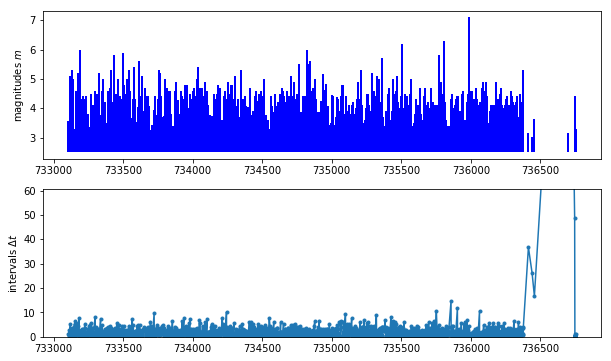

In [8]:
plt.figure(figsize=(10,6))
plt.clf()
ax1 = plt.subplot('211')
ax2 = plt.subplot('212', sharex=ax1)
#ax1.plot(etas.catalog['event_date'], etas.catalog['mag'], marker='.', ls='-', label='mag')
f_dates = [mpd.date2num(x.astype(dtm.datetime)) for x in etas.catalog['event_date']]
ax1.vlines(f_dates, (min(etas.catalog['mag'])-.5)*numpy.ones(len(etas.catalog)), 
           etas.catalog['mag'], lw=2., label='mag', color='b')
ax2.plot(f_dates[1:], numpy.diff(f_dates,1), '.-')

ax2.set_ylabel('intervals $\Delta t$')
ax1.set_ylabel('magnitudes $m$')
ax2.set_ylim(0, 1.25*sorted(numpy.diff(f_dates))[-2])

/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


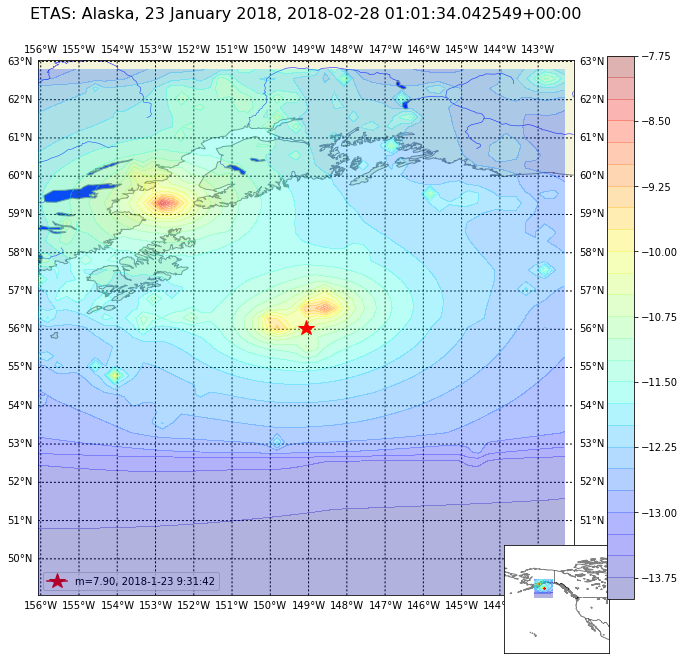

In [9]:
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
ax_mini = fg.add_axes([.65,.05, .15, .15])
cmap='jet'
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='i', alpha=.3, ax=ax, lats_map=etas.lats,
                          lons_map=etas.lons, map_cmap=cmap)

# etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='l', alpha=.3, ax=ax_mini, lats_map=[-89., 89.],
#                           lons_map=[-180., 180.], lat_interval=10., lon_interval=10.)

ll_lon_mini = max(-180, lon0-50.)
ll_lat_mini = max(-89, lat0-50)
ur_lon_mini = min(180., lon0+50.)
ur_lat_mini = min(89, lat0+50)
mp_mini = Basemap(llcrnrlon=ll_lon_mini, llcrnrlat=ll_lat_mini,
                                urcrnrlon=ur_lon_mini, urcrnrlat=ur_lat_mini,
                  resolution='l', projection=etas.cm.projection, lon_0=0., lat_0=0., ax=ax_mini)
mp_mini.drawcoastlines(color='gray', zorder=1)
mp_mini.drawcountries(color='black', zorder=1)

mp_mini.plot([x], [y], latlon=False, marker='*', color='r', ms=2, zorder=24)
#
X,Y = etas.cm(numpy.array(etas.lonses), numpy.array(etas.latses))
Z = numpy.log10(etas.lattice_sites)
#ax_mini.set_ylim(ll_lat_mini, ur_lat_mini)
#ax_mini.set_xlim(ll_lon_mini, ur_lon_mini)
#
etas_contours = ax_mini.contourf(X,Y, Z, 15, zorder=8, alpha=.3, cmap=cmap)
#
# let's get everything m>6 in the last 6 months?
m6s = [rw for rw in etas.catalog if rw['mag'] >= 5.5 
       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>to_dt-dtm.timedelta(days=120)]
#
# plot mainshock:
dt = (mainshock['event_date'].astype(dtm.datetime) if isinstance(mainshock['event_date'], numpy.datetime64)
      else mainshock['event_date'])
dt_ms_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
                   label='m={:.2f}, {}'.format(mainshock['mag'], dt_ms_str))
ax.set_title('ETAS: {}, {}\n\n'.format(etas_name, etas.t_now), size=16)
#for j,m6 in enumerate(m6s):
for j,m6 in enumerate(sorted(sorted(m6s, key=lambda rw:rw['mag'])[:-1], key=lambda rw:rw['event_date'])):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, 
                          c='none', marker='o', zorder=11, label='m={:.2f}, {}'.format(m6['mag'], dt_str))
    #
ax.legend(loc=0)

In [10]:
#print(['{},{}\n'.format(rw['event_date'], rw['mag'] ) for rw in etas.catalog if rw['mag'] >= 5.5])
#len(['{},{}\n'.format(rw['event_date'], rw['mag'] ) for rw in etas.catalog if rw['mag'] >= 5.5
#     and rw['event_date'].astype(dtm.datetime)>dtm.datetime(2016,10,20)])

print(dt, type(dt), dt.year)

2018-01-23 09:31:42+00:00 <class 'datetime.datetime'> 2018


In [11]:
for rw in m6s:
    print(rw)

In [12]:
## hey, pickling works with the new ETAS objects (or at least it appears to...):
# with open('data/etas_201610.pkl', 'wb') as fpkl:
#     pickle.dump( etas, fpkl)    
#
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas2 = pickle.load(fin)
#
#print(etas2.catalog[0:5])
# TODO: we want the datetime part of the filename to come from the etas object itself, for purposes of
# integrity. BUT, we want this script to be a bit more portable, so we should replace all the etas
# references/object name to just 'etas'
#
etas.export_kml(os.path.join(f_path, '{}_{}.kml'.format(f_root, str(etas.t_now).replace(' ', '_'))), 
                kml_contours_bottom=.25, kml_contours_top=1.0)

etas.export_xyz(os.path.join(f_path, '{}_{}.xyz'.format(f_root, str(etas.t_now).replace(' ', '_'))))
fg.savefig(os.path.join(f_path, '{}_{}.png'.format(f_root, str(etas.t_now).replace(' ', '_'))))

with open (os.path.join(f_path, '{}_{}.pkl'.format(f_root, str(etas.t_now).replace(' ', '_'))), 'wb') as fpkl:
    pickle.dump(etas, fpkl)

kml bottom, top:  6 25


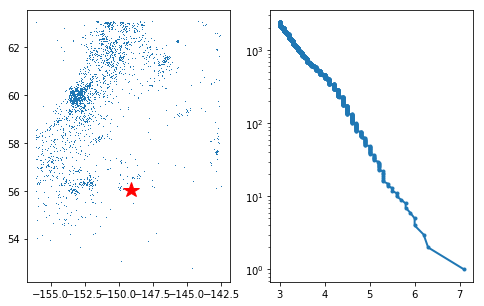

In [13]:
plt.figure(figsize=(8,5))
plt.clf()
ax1=plt.subplot('121')
ax2=plt.subplot('122')
ax1.plot(etas.catalog['lon'], etas.catalog['lat'], ',')
ax1.plot([mainshock['lon']], [mainshock['lat']], marker='*', color='r', ms=16, zorder=11)
#
ax2.plot([m for m in reversed(sorted(etas.catalog['mag']))], numpy.arange(1,len(etas.catalog)+1),
         '.-', lw=2.)
ax2.set_yscale('log')

In [14]:
#print(etas.mc, etas.mc_etas)

### ETAS cross-sections:
- What is the best way to produce an ETAS cross section?
#### PCA and coordinate rotation method(s):
- Start with a more or less contemporary method; compute (global) PCA; rotate along the major axis; cross section is the median "x'" row.
  - Variations: mean-subtract via (un-) weighted or custom location (to specify the center of rotation)
  - ???
##### Comment on this method:
- Straight forward(ish) in principle, and fairly conventional in the Physics community, but potentially compute intensive, and clumsy to customize or do anything but straight lines.
- Also, this breaks the grid-symmetry of the lattice (it rotates the whole lattice), so plotting, etc. of the rotated frame would require reconstruction onto a new lattice.
- Even if we don't want to do gridded plots, it moves points off of the original lattice, for whatever that's worth.

### TODO items:

####
Add bounds selection:
- We've started with PCA over the full map domain, assuming the 'mainshock' dominates/characterizes the space.
- Obviously, this will not always be the case, so add options to select a lat/lon subdomain.
- Then, we move on to the generalized NN-interpoladed cross section

#### NN to any user defined path:
- Designate a path -- it can be a straight line.
- Use an *sklearn* NN finding algorithm to find the closest $n$ points in the ETAS map to each point in the path (we will need to define our path to have sufficient resolution)
- Compute the z-value for each point on the path from a mean (presumably weighted by distance) between each point on the path and its NN values.
- Note: we could generalize this to use the entie map for each point... which might be interesting as well.
- Note: we'll need some sort of Omori like weighting, to handle singularities, but this can be more or less arbitrarily chosen.... and it's just the weighting, so it should not have huge effect in most cases.
- **Note possible application:** We might use something like this to stitch together smaller earthquakes (ETAS halos) to estimate rupture-hazard zones for larger events (aka, stitch togetehr hot-spots that are more or less in a line, or consistent with a geophysical profile (regional faults) of some sort).


In [132]:
# plot a cross-section of ETAS. let's get smart about this and do a PCA on the xyz field...
#XYw = numpy.array([[x*z, y*z] for x,y,z in etas.ETAS_array])
class PCA_cross_section(list):
    def __init__(self, XYW, x_min=None, x_max=None, y_min=None, y_max=None, n_NN=4, n_points_xc=None):
        # compute the covariance of [[x*w, y*w], ...], get eigen-value/vectors,
        #  construct a cross section vector, then compute cross-section values via a weighted
        #  average (which we can show is a Bayes maximum-likelihood value) from each point's NN.
        # TODO: add an option for a distance calculation? use a spherical distance formula in
        #  both the NN finder (presumably from sklearn, which i think uses an r-tree index) and
        #  the weighted average.
        #
        # TODO: do we need to keep the original inputs? this is more memory and compute intensive. how often
        #  do we re-use these objects? are we typically better off just recomputing the whole class for variations
        #  on PCA bounds, etc?
        XYW = numpy.array(XYW)
        #
        if x_min is None: x_min = min(XYW.T[0])
        if x_max is None: x_max = max(XYW.T[0])
        if y_min is None: y_min = min(XYW.T[1])
        if y_max is None: y_max = max(XYW.T[1])
        #
        #XYW_pca = XYW[XYW.T[0]>=x_min and XYW.T[0]<=x_max and XYW.T[1]>=y_min and XYW.T[1]<=y_max]
        f_between = lambda x, y, x1, x2, y1, y2: (x>=x1 and x<=x2 and y>=y1 and y<=y2)
        #
        # trying to use numpy indexing here, so we end up keeping the indices of the array where these
        #  criteria are met. having trouble getting it to take a multi-valued condition. maybe the better
        #  approach is to pass an array of indices that satisfy the "between" condition?
        #
        # this requires multiple passes throught the array (which is most likely not terribly costly)
        #XYW_pca = XYW[XYW.T[0]>=x_min]
        #XYW_pca = XYW_pca[XYW.T[0]<=x_max]
        XYW_pca = XYW[numpy.array([k for k,(x,y,w) in enumerate(XYW) 
                                   if f_between(x,y, x_min, x_max, y_min, y_max)])]
        #
        #print('***DEBUG lens: ', len(XYW_pca), len(XYW))
        n_points_xc = n_points_xc or len(XYW_pca)
        #
        #XYw_pca = numpy.array([[x*w,y*w] for x,y,w in XYW_pca ])
        # TODO?: interpolate Y,w onto a regulaized X axis, or assume valid inputs?
        #
        #w_cov = numpy.cov(XYw_pca, rowvar=False)
        # TODO: will matrices be properly aligned if we just skip all of the A.T ? probably at least
        #      one layer of this to revise...
        #
        # as a sanity check, do a line-fit to the local data to get an approximate b-value:
        xy_w = XYW_pca.T[0:2].T*numpy.atleast_2d(XYW_pca.T[2]).T
        lsq_xyz = numpy.linalg.lstsq([[1.,x] for x,y in xy_w], [y for x,y in xy_w])
        #print('** DEBUG lsq: ', lsq_xyz[0])
        #
        w_cov = numpy.cov(XYW_pca.T[0:2].T*numpy.atleast_2d(XYW_pca.T[2]).T, rowvar=False)
        # Note: leave eig_vecs matrix intact, so we can use it for rotation transformations.
        eig_vals, eig_vecs = numpy.linalg.eig(w_cov)
        #print('*** Debug (prelim): ', eig_vals, eig_vecs)
        #
        # now, sort by eigenvalues:
        idx = (eig_vals**2.).argsort()[::-1]   
        #
        #print('eigs (idx, vals, vecs): ', idx, len(eig_vals), len(eig_vecs))
        #
        #eig_vals = eig_vals.T[idx].T
        # TODO: sort out (equivalent) syntax for (not) fancy inxing... this is from SourceForge, or
        #    or something, but it is not quite right (i never use this syntax, but it's probably fast)
        #e1,e2 = eig_vecs[:,idx]
        # this looks correct (ish):
        e1, e2 = eig_vecs.T[idx]
        # note: we need to be careful about how we define the vectors of the data vs the axes. are we
        #   rotating the axes to the data or the data to the axes (which are identical/inverse) operations
        #   but it is important to be clear with respect too making rotations vs drawing cross-secgtions.
        #
        #print('*** e1, e2: ', e1, e2)
        #print('eigs (idx, vals, vecs): ', idx, len(eig_vals), len(eig_vecs))
        #
        # Compute linear slope factors, for y' = a + bx type transformations, as opposed to the
        #  X' = dot(e_k, X) or X' = L_x*e_1, y' = L_y * e_2 approaches (just multiplying the eigen-vectors).
        b_major = e1[1]/e1[0] 
        b_minor = e2[1]/e2[0]
        #
        # stash inputs:
        self.__dict__.update({key:val for key,val in locals().items() if not key in ('self', '__class__')})
        #
        # etas.ETAS_array['x'], y0 + b_major*(etas.ETAS_array['x'] - x0)
        X_pca, Y_pca, W_pca = XYW_pca.T
        X = numpy.array(sorted(set(X_pca)))
        # XY = [pca_cross_2.e1*x for x in numpy.linspace(-5., 5., 100)]
        #
        dx = max(X_pca)-min(X_pca)
        x0 = numpy.mean(X_pca)
        y0 = numpy.mean(Y_pca)
        Xs = numpy.linspace(-dx, dx, n_points_xc)
        # numpy.mean(X_pca)
        #
        # TODO: maybe revisit the default cross-section vector.
        super(PCA_cross_section, self).__init__(numpy.array([X, 
                                                    numpy.mean(Y_pca) + b_major*(X-numpy.mean(X_pca))]).T)
        #y0 = numpy.mean(Y_pca)
        #
        # probably the 'right' way to compute the cross-section vector is to just multiply (scale) and 
        #  translate (add to) the eigen-vector:
        #super(PCA_cross_section, self).__init__([[e1[0]*x + x0, e1[1]*x + y0]
        #                                for x in numpy.linspace(-dx, dx, n_points_xc)])
        del X_pca, Y_pca, W_pca, X
        #
        
    #
    def get_cross_section_xy(self, x_min=None, x_max=None, y_min=None, y_max=None, n_points=250, b=None):
        '''
        # TODO: this should work -- it will return a  cross-section, but i think we need to be more thoughtful
        #     about how we go about this, specifically how we choose the middle. we'll need some variationos
        #     of this to use the center, weighted center, etc. and then a smart way to draw the cross-section
        #     axis through it (y = a + bx vs (x',y') = x*v1)
        #
        '''
        if b is None: b = self.b_major
        #
        if x_min is None:
            x_min = min(self.X)
        if x_max is None:
            x_max = max(self.X)
        if y_min is None:
            y_min = min(self.Y)
        if y_max is None:
            y_max = max(self.Y)
        #
        # 
        X = numpy.linspace(x_min, x_max, n_points)
        #return numpy.array([X, numpy.mean(Y_pca) + b*(X-numpy.mean(self.X_pca))]).T
        #
        # this will use an unweighted mean to center:
        #return numpy.array([[x,y] for x,y in 
        #                numpy.array([X, numpy.mean(self.Y_pca) + b*(X-numpy.mean(self.X_pca))]).T
        #                    if (y>=y_min and y<=y_max)])
        #
        # ... and a weighted mean:
        return numpy.array([[x,y] for x,y in 
                        numpy.array([X, numpy.average(self.Y_pca, weights=self.W_pca) +
                                     b*(X-numpy.average(self.X_pca, weights=self.W_pca))]).T
                            if (y>=y_min and y<=y_max)])

    def get_cross_section_zs(self, XY_xc=None, XYZ=None, n_NN=None):
        #TODO: this is not working. so maybe take it off-line to work out the code, then put back into
        #    the class.
        #
        n_NN = n_NN or self.n_NN
        if XY_xc is None: XY_xc = numpy.array(self)
        #if XYZ is None:   XYZ = self.XYW_pca
        if XYZ is None:   XYZ = self.XYW
        #
        # get NN:
        # TODO: look at "fancy" indexing version of this X.T[0:2].T operation, something like:
        #   X[0:2, :]
        nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=n_NN,
                                                algorithm='ball_tree').fit(XYZ.T[0:2].T)
        #
        # TODO: i think a better and more efficient way to do this is to just assign the weights, from
        #  the distances, as w_jk = 1/(r_jk + <r>_k) or 1.
        #  where "or" kicks in if the denominator (r_jk + <r>_k) == 0
        # we will want to carefully evaluate the corner cases and evaluate how the fraction addition
        # is affected when we have these singular cases.
        
        distances, indices = nbrs.kneighbors(XY_xc)
        #
        # TODO: are distances always positive?
        mean_distances = numpy.mean(distances, axis=1)
        #denom = numpy.array([1./r if r!=0 else 1. for r in mean_distances])
        weights        = numpy.array([[1./(r+mu) if (r+mu)!=0. else 1. for r in rw]
                                      for rw, mu in zip(distances, mean_distances)])
        
        #
        # we want a weighted average of the z values, based on NN distances,
        # z_xc_k = sum_j(z_j/r_jk)/sum(1/r_jk)
        # but we need to handle 1/0 cases in a generalized way. maybe something like:
        # w = 1/(r_jk + a*<r>_k)
        # where <r>_k is the mean nn distance and a is a tuning parameter;
        #  if <r>==0, evenly weight all elements?
        #
        # like this:
        # (but the main thing is to efficiently handle the x/0 cases).
        #
        z_xc = [numpy.dot(XYZ.T[2][js], ws)/numpy.sum(ws)
                for js, ws, mu in zip(indices, weights, mean_distances)]
        #z_xc = [numpy.sum([XYZ[j][2] for j in js]) for js, ws, mu in zip(indices, weights, mean_distances)]
        #
        return z_xc
        
    #@property
    #def XYW_pca(self):
    #    numpy.array([[x,y,w] for x,y,w in XYw if (x>=x_min and x<=x_max and y>=y_min and y<=y_max) ])
    #
    @property
    def X(self):
        return self.XYW.T[0]
    @property
    def Y(self):
        return self.XYW.T[1]
    @property
    def w(self):
        return self.XYW.T[2]
    #
    @property
    def X_pca(self):
        return self.XYW_pca.T[0]
    @property
    def Y_pca(self):
        return self.XYW_pca.T[1]
    @property
    def W_pca(self):
        return self.XYW_pca.T[2]
    #
    
    
    
pca_cross = PCA_cross_section(XYW = numpy.array([etas.ETAS_array['x'], etas.ETAS_array['y'], 
                                        numpy.log(etas.ETAS_array['z'])]).T,
                             x_min=-148, x_max=-145, y_min=61., y_max=None, n_NN=4, )
pca_cross_2 = PCA_cross_section(XYW = numpy.array([etas.ETAS_array['x'], etas.ETAS_array['y'],
                                        numpy.log(etas.ETAS_array['z'])]).T,
                             x_min=-152., x_max=-146., y_min=53., y_max=59., n_NN=4, )


-0.3760146615354754
0.999999991334636
eig_vecs.T:  [(0.0, 0.86715305551901489), (0, -0.498041743535656)]
dot_vecs:  0.0
dot_e:  0.0
dot_e:  0.0
e1, e2:  [ 0.86715306 -0.49804174] [ 0.49804174  0.86715306]
e1, e2:  [ 0.96809593 -0.25057985] [ 0.25057985  0.96809593]


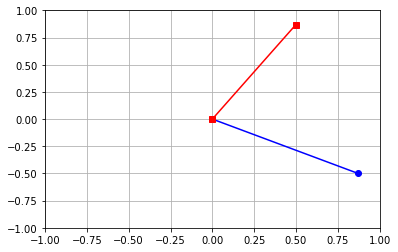

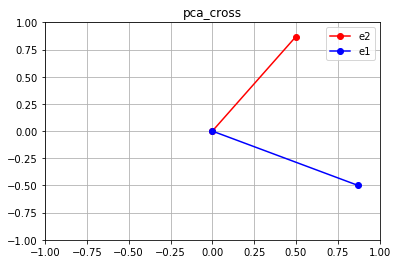

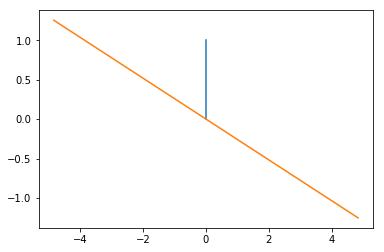

In [133]:
print(0.35195595/(-0.93601656))
print(0.35195595**2. + (-0.93601656)**2.)

fg = plt.figure()
ax=plt.gca()
#
ax.plot(*zip([0.,0.], pca_cross.eig_vecs.T[0]), color='b', ls='-', marker='o')
ax.plot(*zip([0.,0.], pca_cross.eig_vecs.T[1]), color='r', ls='-', marker='s')
#ax.plot(range(2), [0., 0.], color='k', alpha=.5, ls='-')
ax.grid()
ax.set_ylim(-1., 1.)
ax.set_xlim(-1., 1.)


fg = plt.figure()
ax=plt.gca()
#
# ax.plot([0., pca_cross.eig_vecs[0][0]], [0., pca_cross.eig_vecs[1][0]], color='b', ls='-', marker='o')
# ax.plot([0., pca_cross.eig_vecs[0][1]], [0., pca_cross.eig_vecs[1][1]], color='b', ls='-', marker='o')


#ax.plot([0., pca_cross.e1[0]], [0., pca_cross.e1[1]], color='r', ls='-', marker='o')
ax.plot(*zip([0., 0.], pca_cross.e2), color='r', ls='-', marker='o', label='e2')
ax.plot(*zip([0., 0.], pca_cross.e1), color='b', ls='-', marker='o', label='e1')
ax.set_title('eig_vals: {}'.format(pca_cross.eig_vals))
ax.grid()
ax.set_ylim(-1., 1.)
ax.set_xlim(-1., 1.)
ax.set_title('pca_cross')
ax.legend(loc=0)
#
print('eig_vecs.T: ', list(zip([0.,0], pca_cross.eig_vecs.T[0])))
print('dot_vecs: ', numpy.dot(pca_cross.eig_vecs.T[0], pca_cross.eig_vecs.T[1]))
print('dot_e: ', numpy.dot(pca_cross.e1, pca_cross.e2))
print('dot_e: ', numpy.dot(pca_cross_2.e1, pca_cross_2.e2))

print('e1, e2: ', pca_cross.e1, pca_cross.e2)
print('e1, e2: ', pca_cross_2.e1, pca_cross_2.e2)

#
plt.figure()
plt.clf()
ax = plt.gca()
XY = [pca_cross_2.e1*x for x in numpy.linspace(-5., 5., 100)]
ax.plot([0., 0.], [0., 1.])
ax.plot(*zip(*XY), ls='-', marker='')


dx, dy:  0.25 0.25


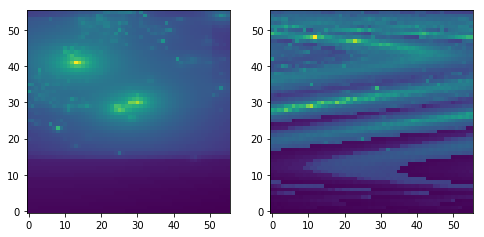

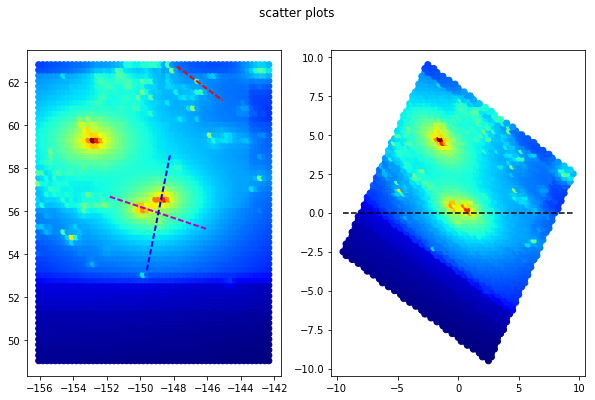

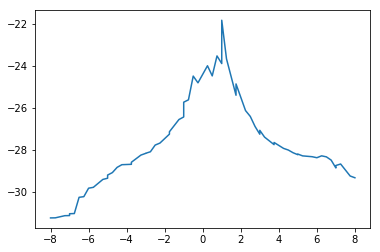

In [134]:
XY_prime = etas.ETAS_array.copy()
XY_prime['x'] -= numpy.mean(XY_prime['x'])
XY_prime['y'] -= numpy.mean(XY_prime['y'])
XY_prime['z'] = numpy.log(XY_prime['z'])
#
X  = sorted(set(XY_prime['x']))
dx = numpy.mean(numpy.diff(X))
Y  = sorted(set(XY_prime['y']))
dy = numpy.mean(numpy.diff(Y))
#
#XY_prime['x'], XY_prime['y'] = numpy.dot(eig_vecs, numpy.array([XY_prime['x'], XY_prime['y']]))
#XY_prime = sorted(list(XY_prime), key=lambda rw: (rw[0], rw[1]))
#
#print('lens: ', len(XY_prime), len(XYw))
plt.figure(figsize=(8,6))
ax1 = plt.subplot('121')
ax2 = plt.subplot('122')
ax1.imshow(numpy.reshape(XY_prime['z'], (len(Y), len(X))), origin='lower')
#
XY_prime['x'], XY_prime['y'] = numpy.dot(pca_cross.eig_vecs, numpy.array([XY_prime['x'], XY_prime['y']]))
#
# now, we need to 'snap' (x,y) to a regular lattice. a few options for this, like x' = x - x%dx
#   but we nominally want to snap to the closest point... we also need to fill in the lattice, so this is
#   not super simple if we want to do contours, imshow(), etc. but to just get data... we can do this.
#
#XY_prime['x'] -= XY_prime['x']%dx
#XY_prime['y'] -= XY_prime['y']%dy

XY_prime['x'] = dx*numpy.round(XY_prime['x']/dx)
XY_prime['y'] = dy*numpy.round(XY_prime['y']/dy)
#
print('dx, dy: ', dx, dy)
#XY_prime = sorted([[x,y,z] for x,y,z in XY_prime], key=lambda rw: (rw[0], rw[1]))
#
XY_prime.sort(order = ('y', 'x'))
#
ax2.imshow(numpy.reshape([z for x,y,z in XY_prime], (len(X), len(Y))), origin='lower')
#ax2.contourf(XY_prime['x'], XY_prime['y'], XY_prime['z'], N=15)
#
plt.figure(figsize=(10,6))
plt.clf()
plt.suptitle('scatter plots')
ax1 = plt.subplot('121')
ax2 = plt.subplot('122')
ax2.scatter(x=XY_prime['x'], y=XY_prime['y'], c=XY_prime['z'], cmap='jet')
ax2.plot([min(XY_prime['x']), max(XY_prime['x'])], [0.,0.], ls='--', marker='', zorder=11, color='k')
ax1.scatter(x=etas.ETAS_array['x'], y=etas.ETAS_array['y'], c=numpy.log(etas.ETAS_array['z']),
            cmap='jet')
#
x0 = numpy.mean(etas.ETAS_array['x'])
y0 = numpy.mean(etas.ETAS_array['y'])
#
b_major = pca_cross_2.eig_vecs.T[1][1]/pca_cross_2.eig_vecs.T[1][0]
#
# TODO: reconsile this transformation; i think this local calculation is wrong:
#ax1.plot(etas.ETAS_array['x'], y0 + b_major*(etas.ETAS_array['x'] - x0), color='k', ls='-', lw=2., zorder=11)
ax1.plot(*zip(*pca_cross), color='r', ls='--', lw=2., zorder=12)
ax1.plot(*zip(*pca_cross_2), color='m', ls='--', lw=2., zorder=12)
#
ax1.plot(*zip(*pca_cross_2.get_cross_section_xy(b=pca_cross_2.b_minor, 
                y_min=min(pca_cross_2.Y_pca), y_max=max(pca_cross_2.Y_pca))),
         ls='--', lw=2., color='b', zorder=12)
#
#########################################
#########################################

#
# now, get the median row, along the x' axis. note: we want to be careful to get an actual y-value, not
#  an intermediate, and the data are no longer properly gridded... but the are snapped to a grid.
y_med = sorted(XY_prime['y'])[int(.5*len(XY_prime))]
x_section = [[x,z] for x,y,z in XY_prime if y==y_med]
plt.figure()
ax=plt.gca()
ax.plot(*zip(*x_section), ls='-', marker='')
# plt.figure()
# ax=plt.gca()
# ax.plot([z for x,y,z in XY_prime if y==y_med], ls='-', marker='')
#
#
#plt.figure()
##my_xy = [[x,y,z] for x,y in zip(etas.catalog['lon'], etas['lat']) if x>=42.25 and x<=42.75]
#my_xyz = [[x,y,z] for x,y,z in etas.ETAS_array if y>=42.25 and y<=42.75]
#plt.figure(figsize=(8,6))
#plt.plot([x for x,y,z in my_xyz ], [z for x,y,z in my_xyz], '.')

#etas.make_etas_contour_map()

lens:  250 250


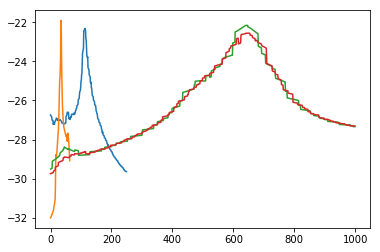

In [136]:
my_vec = pca_cross_2.get_cross_section_xy()
#b=pca_cross_2.b_minor, 
#                y_min=min(pca_cross_2.Y_pca), y_max=max(pca_cross_2.Y_pca))
zs = pca_cross_2.get_cross_section_zs(my_vec, n_NN=4)

print('lens: ', len(my_vec), len(zs))
xy_mean = numpy.average(pca_cross.XYW.T[0:2].T, weights=pca_cross.XYW.T[2], axis=0)
xy_cross = xy_mean + numpy.array([pca_cross_2.e2*x for x in numpy.linspace(-3.,3.,1000)])

plt.figure()
ax = plt.gca()
ax.plot(zs)
ax.plot(pca_cross_2.get_cross_section_zs(pca_cross_2.get_cross_section_xy(b=pca_cross_2.b_minor)))
ax.plot(pca_cross.get_cross_section_zs(xy_cross))

ax.plot(pca_cross.get_cross_section_zs(xy_cross, n_NN=10))



In [ ]:
mycat = atp.catfromANSS(lon=lons, lat=lats, minMag=2.5,
                        dates0=[dtm.datetime(2005,1,1, tzinfo=tzutc), None], Nmax=None, fout=None, rec_array=True)


In [ ]:
# TODO: take a look at the ComCat library, which should combine multiple catalogs and may provide
#  tensor solution information, like strike, etc.
#
test_cat = atp.catfromANSS(lat=lats, lon=lons, minMag=1.5,
                           dates0=[dtm.datetime(1990,1,1, tzinfo=pytz.utc), dtm.datetime.now(pytz.utc)])


plt.figure()
plt.clf()
#plt.plot(test_cat['lon'], test_cat['lat'], '.')
print(test_cat[-5:])
print(max(test_cat['event_date']))

plt.figure(figsize=(8,5))
plt.clf()
ax1=plt.subplot('121')
ax2=plt.subplot('122')
ax1.plot(test_cat['lon'], test_cat['lat'], ',')
ax1.plot([mainshock['lon']], [mainshock['lat']], marker='*', color='r', ms=16, zorder=11)
#
ax2.plot([m for m in reversed(sorted(test_cat['mag']))], numpy.arange(1,len(test_cat)+1),
         '.-', lw=2.)
ax2.set_yscale('log')

In [ ]:
plt.figure(figsize=(12,4))
plt.clf()
ax=plt.gca()
n=1500
ax.plot(test_cat['event_date'][-n:], test_cat['mag'][-n:], '.-')
ax.plot(etas.catalog['event_date'][-n:], etas.catalog['mag'][-n:], '.-')

In [ ]:
test_cat[-10:]

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.gca()

def f_omori(t, tau=1., t0=1., p=1.):
    return 1./(tau*(t0 + t)**p)

X = numpy.linspace(0., 10., 1000)

ax.plot(X, f_omori(X, p=1.00), ls='-', marker='', lw=3., label='$p=1, t0=1, \\tau=1$')
#ax.plot(X, f_omori(X, p=1.5), ls='-', marker='', lw=3., label='$p=1.5$')

ax.plot(X, f_omori(X, t0=1.5, p=1.00), ls='-', marker='', lw=3., label='$p=1$, t_0=1.5, \\tau=1.0')
ax.plot(X, f_omori(X, t0=.5, p=1.00), ls='-', marker='', lw=3., label='$p=1$, t_0=0.5, \\tau=1.0')

ax.plot(X, f_omori(X, p=1.00, tau=1.5), ls='-', marker='', lw=3., label='$p=1$, t_0=0.5, \\tau=1.5')
ax.plot(X, f_omori(X, p=1.00, tau=.5), ls='-', marker='', lw=3., label='$p=1$, t_0=1.0, \\tau=0.5')

#
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('time $t$', size=18)
ax.set_ylabel('Rate or Density $\\rho$', size=18)
ax.set_title('An Omori-like modified power law')
ax.legend(loc=0)



In [ ]:
plt.figure(figsize=(10,8))
ax = plt.gca()
X = numpy.array([x.astype(float) for x in etas.catalog['event_date']])
X -= min(X)
n = 20
Y = numpy.array([x2 - x1 for x1,x2 in zip(X[0:-n], X[n:]) ])

ax.plot(X[n:], Y)
#ax.set_yscale('log')

print(etas.catalog.dtype)
print(etas.catalog['event_date'][0:5])
type(etas.catalog['event_date'][0])